# We will be using indicators to find out if students will become alcoholics

In [1]:
#imports
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# concatenate the two datasets, make a copy

In [2]:
data1 = pd.read_csv("student-mat.csv")
data2 = pd.read_csv("student-por.csv")

data = pd.concat([data1, data2])
data = data.drop(columns = ['school'])
data.head()

with_names = data

## Now we must clean up the dataset to prepare it for the model. 

In [3]:
le = preprocessing.LabelEncoder()

data['sex'] = le.fit_transform(data['sex'])
data['address'] = le.fit_transform(data['address'])
data['famsize'] = le.fit_transform(data['famsize'])
data['Pstatus'] = le.fit_transform(data['Pstatus'])
data['Fjob'] = le.fit_transform(data['Fjob'])
data['Mjob'] = le.fit_transform(data['Mjob'])
data['reason'] = le.fit_transform(data['reason'])
data['guardian'] = le.fit_transform(data['guardian'])
data['schoolsup'] = le.fit_transform(data['schoolsup'])
data['famsup'] = le.fit_transform(data['famsup'])
data['paid'] = le.fit_transform(data['paid'])
data['activities'] = le.fit_transform(data['activities'])
data['nursery'] = le.fit_transform(data['nursery'])
data['higher'] = le.fit_transform(data['higher'])
data['internet'] = le.fit_transform(data['internet'])
data['romantic'] = le.fit_transform(data['romantic'])

data.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,18,1,0,0,4,4,0,4,0,...,4,3,4,1,1,3,6,5,6,6
1,0,17,1,0,1,1,1,0,2,0,...,5,3,3,1,1,3,4,5,5,6
2,0,15,1,1,1,1,1,0,2,2,...,4,3,2,2,3,3,10,7,8,10
3,0,15,1,0,1,4,2,1,3,1,...,3,2,2,1,1,5,2,15,14,15
4,0,16,1,0,1,3,3,2,2,1,...,4,3,2,1,2,5,4,6,10,10


Text(0, 0.5, 'Drinks')

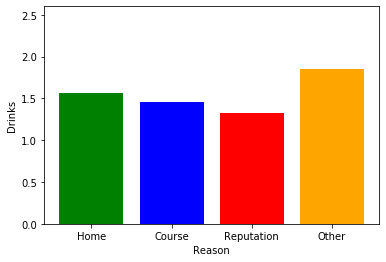

In [68]:
home = 0
home_drinks = 0
course = 0
course_drinks = 0
reputation = 0
reputation_drinks = 0
other = 0
other_drinks = 0

for i in range(len(with_names.index)):
    if with_names.iloc[i]['reason'] == 'home':
        home += 1
        home_drinks += with_names.iloc[i]['Dalc']
    elif with_names.iloc[i]['reason'] == 'course':
        course += 1
        course_drinks += with_names.iloc[i]['Dalc']
    elif with_names.iloc[i]['reason'] == 'reputation':
        reputation += 1
        reputation_drinks += with_names.iloc[i]['Dalc']
    else:
        other += 1
        other_drinks += with_names.iloc[i]['Dalc']

home_drinks /= home
course_drinks /= course
reputation_drinks /= reputation
other_drinks /= other

colors = ['green', 'blue', 'red', 'orange']

plt.bar(['Home', 'Course', 'Reputation', 'Other'], 
        [home_drinks, course_drinks, reputation_drinks, other_drinks],
        color = colors)
plt.ylim(top = 2.6)
plt.xlabel('Reason')
plt.ylabel('Drinks')

In [ ]:
# note that students who chose their school for a reson other than it being close to home, having good courses
# or having a strong reputation tend to drink a lot more alcohol